# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 12th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

We define some visualize functions to reuse during the notebook

In [1]:
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    
def visualize3(tigre_f,tigre_x,tigre_xb,label1,label2,label3):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    fig.add_subplot(1,3,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre_xb, cmap='gray')


def visualize4(tigre1,tigre2,tigre3,tigre4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(tigre1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre2, cmap='gray')
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre3, cmap='gray')
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(tigre4, cmap='gray')
    
def visualize4NotRescaled(tigre1,tigre2,tigre3,tigre4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(tigre1, cmap='gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre2, cmap='gray', vmin=0, vmax=255)
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre3, cmap='gray', vmin=0, vmax=255)
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(tigre4, cmap='gray', vmin=0, vmax=255)


### 2.1 RGB histogram visualization

a) Read the image "face.png" in the folder "images" and visualize the RGB image as well as each of its channels separately (R, G, and B).
Note: Before applying the histogram, you should pass the image into float.

/home/pau/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


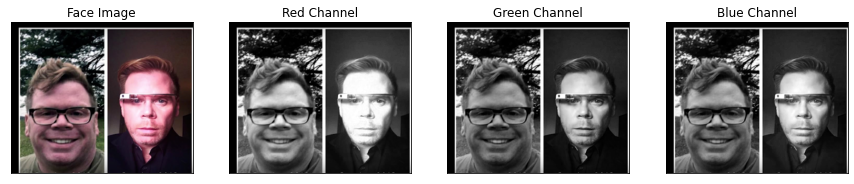

In [2]:
from skimage import io
from matplotlib import pyplot as plt

face = io.imread("images/face.png")

visualize4(
    face, face[:,:,0], face[:,:,1], face[:,:,2],
    "Face Image", "Red Channel", "Green Channel", "Blue Channel"
)

b) Visualize the histogram of the image. What is the histogram representing for an image? 
The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

    - Obtain the histogram with 8 and 32 bins. 

    - Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

An histogram is a representation of the number of times a value (in our case color value) appears in a distribution. Saying it more precisely, it's the frequency of each of the colour values in the matrix representing the image (the gray column is just black and white). The nbins is the size of the step: 8 marks the tolerancy in 32 (=256/8), the 0 counts the values between the 0 and 31, the 1 between 32 and 63, and cotinuing in this fashion for each step. 32 means the size of the tolerancy is 256/32 = 8 (0-7,8-15,16-23....)

To calculate the histogram by "counting" the type must be uint8. It can be done with float64 if you divide the interval [0,1] in parts, but it's not recomended due being not that good. 

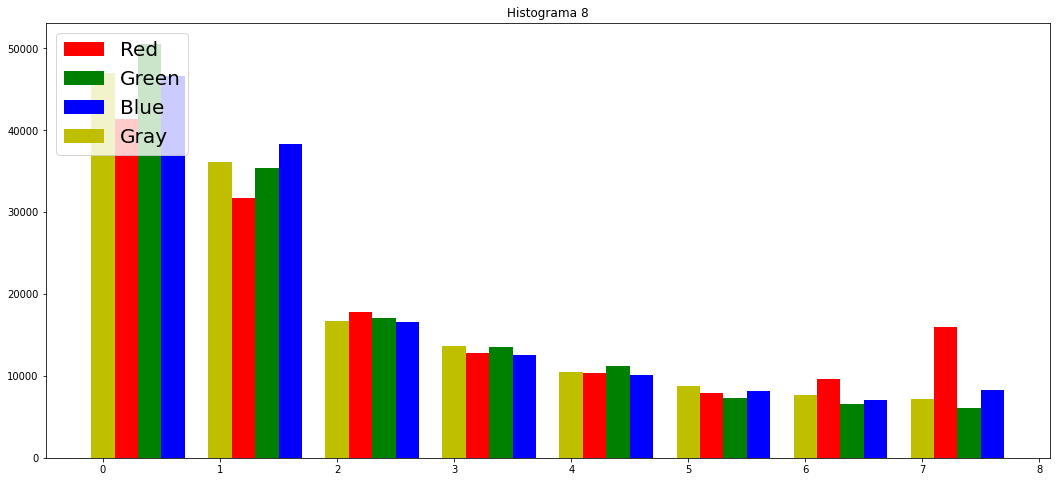

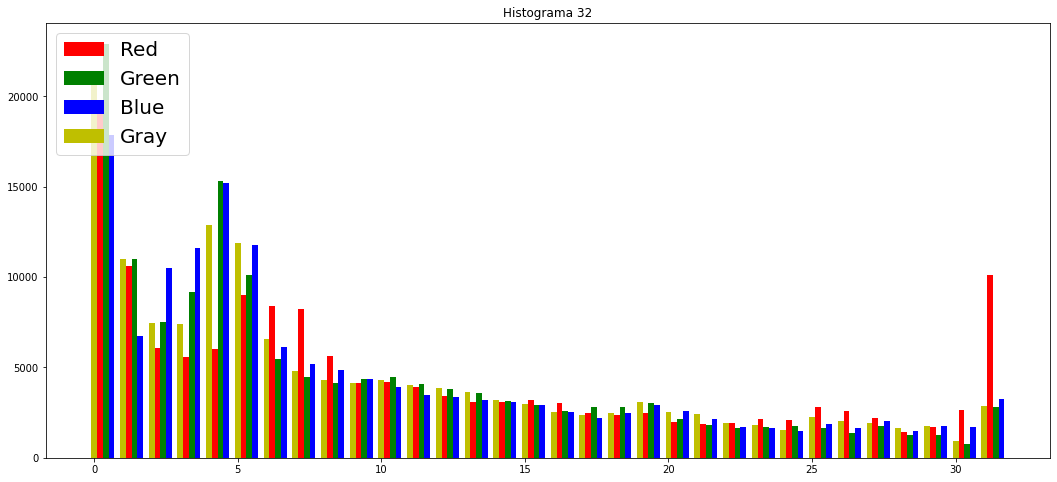

In [3]:
from skimage.exposure import histogram
from skimage import img_as_float
import numpy as np
from skimage.color import rgba2rgb, rgb2gray

#ha de rebre l'imatge en grisos i 4 canals
def makeHistogram(image, numberOfBins, title):
    #Passem a rgb per poder prendre l'escala de grisos, esta be o es pot fer diferent?
    if(image.shape[2]==4):
        image_gray=rgb2gray(rgba2rgb(image))
    else:
        image_gray=rgb2gray(image)
    
    hst_r, bins_r = histogram( img_as_float(image[:,:,0]), nbins=numberOfBins)
    hst_g, bins_g = histogram( img_as_float(image[:,:,1]), nbins=numberOfBins)
    hst_b, bins_b = histogram( img_as_float(image[:,:,2]), nbins=numberOfBins)
    hst_gy, bins_gy = histogram( img_as_float(image_gray[:,:]), nbins=numberOfBins)
    
    ind = np.arange(numberOfBins)

    fig = plt.figure(figsize=(18,8))
    cl_gy = plt.bar( ind, hst_gy,0.2, color='y')
    cl_r = plt.bar( ind+.2, hst_r, 0.2, color='r')
    cl_g = plt.bar( ind+.4, hst_g,0.2, color='g')
    cl_b = plt.bar( ind+.6, hst_b,0.2, color='b')
    plt.legend((cl_r[0], cl_g[0], cl_b[0], cl_gy[0]), ('Red','Green','Blue', 'Gray'), loc=2, prop={'size': 20})
    plt.title(title)
    plt.show()

    
makeHistogram(face, 8, 'Histograma 8')
makeHistogram(face, 32, 'Histograma 32')


### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `face.png` and apply each of the following steps:

1. Convert it to grayscale with the function `color.rgb2gray()` of the package `skimage`.
2. Convolve it with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
3. Convolve the grayscale image in (1) with a transposed version of the mask in (2).
4. Convolve the grayscale image in (1) with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

**Visualize the output of each step (1 to 4) next to each other. Write short titles on each figure to make them understandable.**

#### Questions

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Note: Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).

Image: Face Gray 		Type:  uint8 	Shape:  (350, 422) 	vMax:  255 	vMin:  0
Image: Horizontal Smooth 	Type:  uint8 	Shape:  (350, 422) 	vMax:  253 	vMin:  0
Image: Vertical Smoot 		Type:  uint8 	Shape:  (350, 422) 	vMax:  255 	vMin:  0
Image: 2D Smoot 		Type:  uint8 	Shape:  (350, 422) 	vMax:  240 	vMin:  0


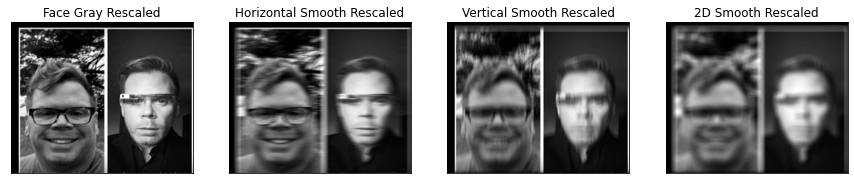

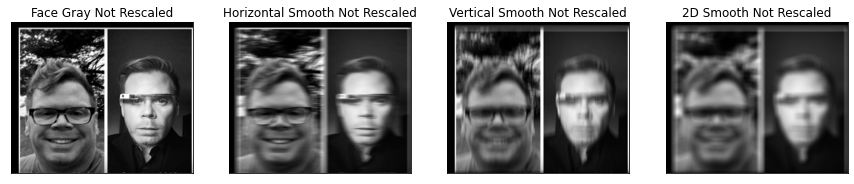

In [4]:
from scipy.ndimage import convolve

face_g=rgb2gray(rgba2rgb(face)) 

mask_1d = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
mask_1d = mask_1d/np.sum(mask_1d) #Normalize

mask_2d = np.ones((15,15)) 
mask_2d = mask_2d/np.sum(mask_2d) #Normalize

face_g=255.0*face_g
face_g=face_g.astype('uint8')

convolved_face_h = convolve(face_g, mask_1d, mode='constant', cval=0.0)
convolved_face_v = convolve(face_g, np.transpose(mask_1d), mode='constant', cval=0.0)
convolved_face_2d = convolve(face_g, mask_2d, mode='constant', cval=0.0)


print("Image: Face Gray", "\t\tType: ", face_g.dtype, "\tShape: ", face_g.shape, "\tvMax: ", face_g.max(), "\tvMin: ", face_g.min())
print("Image: Horizontal Smooth", "\tType: ", convolved_face_h.dtype, "\tShape: ", convolved_face_h.shape, "\tvMax: ", convolved_face_h.max(), "\tvMin: ", convolved_face_h.min())
print("Image: Vertical Smoot", "\t\tType: ", convolved_face_v.dtype, "\tShape: ", convolved_face_v.shape, "\tvMax: ", convolved_face_v.max(), "\tvMin: ", convolved_face_v.min())
print("Image: 2D Smoot", "\t\tType: ", convolved_face_2d.dtype, "\tShape: ", convolved_face_2d.shape, "\tvMax: ", convolved_face_2d.max(), "\tvMin: ", convolved_face_2d.min())


visualize4(
    face_g, convolved_face_h, convolved_face_v, convolved_face_2d,
    "Face Gray Rescaled", "Horizontal Smooth Rescaled", "Vertical Smooth Rescaled", "2D Smooth Rescaled"
)


visualize4NotRescaled(
    face_g, convolved_face_h, convolved_face_v, convolved_face_2d,
    "Face Gray Not Rescaled", "Horizontal Smooth Not Rescaled", "Vertical Smooth Not Rescaled", "2D Smooth Not Rescaled"
)

b) Given a color image (im), what is the difference between ***1*** and ***2*** ?
   
***1.***

im_2=np.array(im, dtype='float')


***2.***

im_2=np.array(im)


im_2=img_as_float(im_2)

In [13]:
face_fn = np.array(face,dtype='float')
face_n = np.array(face)
face_s = img_as_float(face_n)

print("Conversion numpy: ", face_fn.shape, face_fn.dtype, face_fn.min(), face_fn.max())
print("Conversion n: ", face_n.shape, face_n.dtype)
print("Conversion Skimage: ", face_s.shape, face_s.dtype,face_s.min(), face_s.max())

Conversion numpy:  (350, 422, 4) float64 0.0 255.0
Conversion n:  (350, 422, 4) uint8
Conversion Skimage:  (350, 422, 4) float64 0.0 1.0


As we can see, the first method does not normalize, it just cast the type to a float between 0. and 255., thing that's not useful.

Instead, the second method normalizes the whole matrix between 0 and 1, thing that is better to operate with this type of image

c) Can we convolve a color (RGB) image? In order to convolve an RGB each of the channels must be convolved separately.

Implement a function that applies a 3-channel filter and visualize its result on `face.png` with a 15x15 uniform mask.

Note: Before applying the convolution assure that the color image is of 3 channels and if not use rgba2rgb().

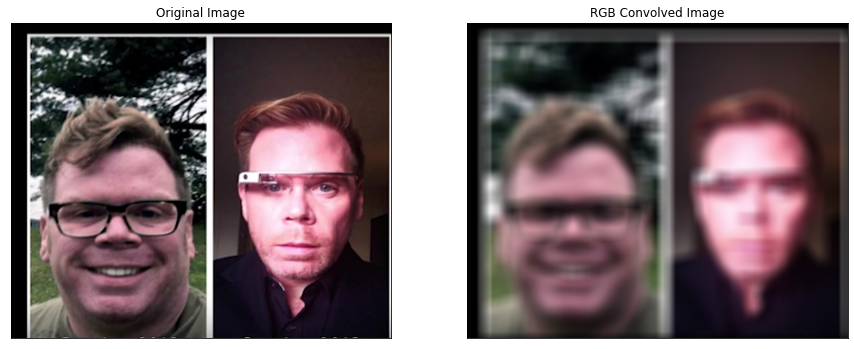

In [17]:
"""
Recive an image (x,y,3) and convolves the three channels separatelyu
Image is returned in float64 (caused by convolve and toRGB)
"""
def convolveRGB(image, mask, mode, cval):
    
    if(image.shape[2]==4):
        image = rgba2rgb(image)
    
    image[:,:,0] = convolve(image[:,:,0], mask, mode=mode, cval=cval)
    image[:,:,1] = convolve(image[:,:,1], mask, mode=mode, cval=cval)
    image[:,:,2] = convolve(image[:,:,2], mask, mode=mode, cval=cval)
    
    return image

image = io.imread('images/face.png')

mask_2d = np.ones((15,15)) 
mask_2d = mask_2d/np.sum(mask_2d) #Normalize

image_convolved = convolveRGB(image, mask_2d, mode='constant', cval=0.0)


visualize2(
    image, image_convolved,
    "Original Image", "RGB Convolved Image"
)

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce it 10 times
2. Augment it 10 times. 
3. Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why.

Note: Use the command `resize` to change the size of the images.


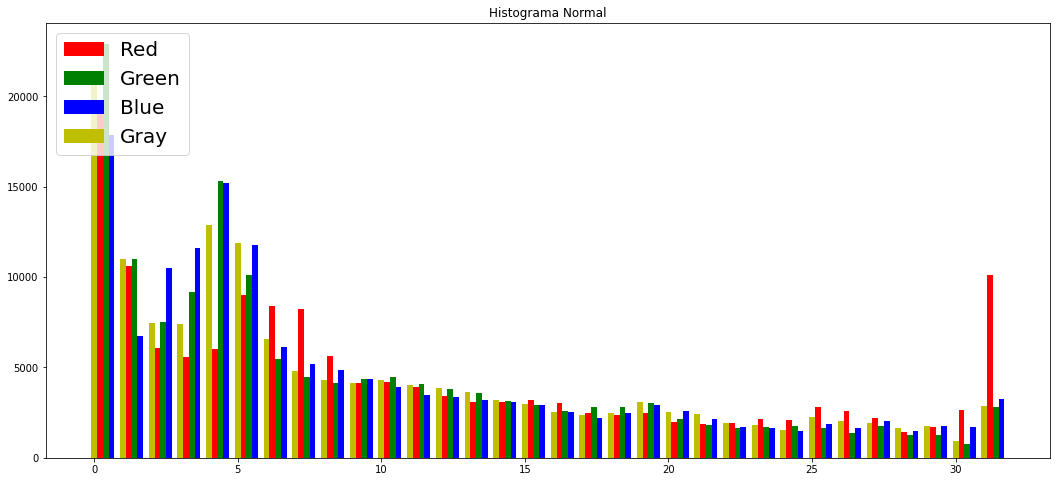

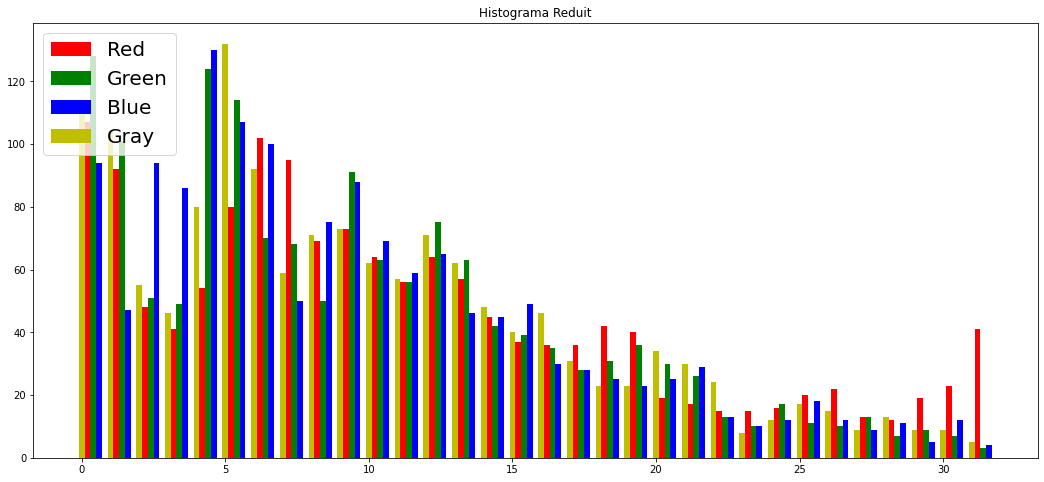

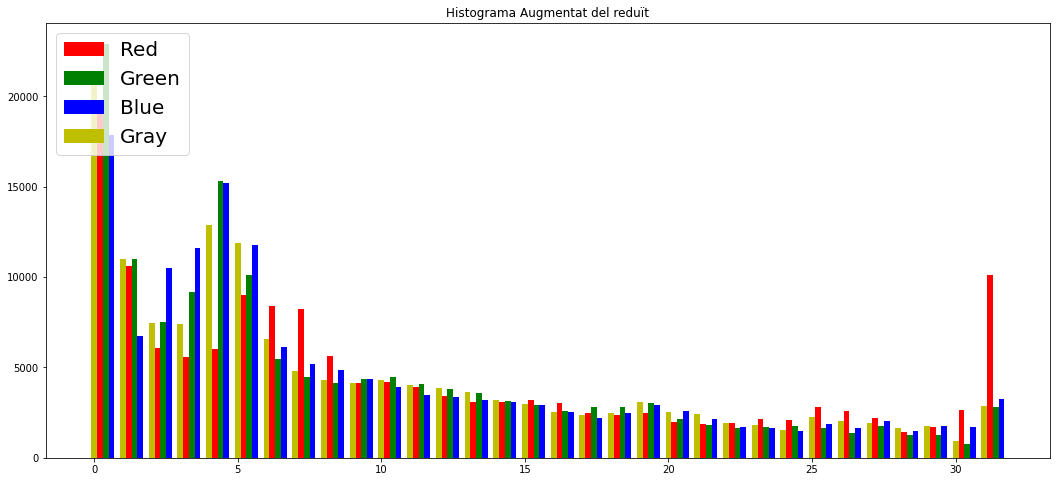

In [19]:
from skimage.transform import resize, rescale #no em preguntis perque però si no l'importes tu sol no hi ha manera

image = io.imread('images/face.png')

makeHistogram(image, 32, 'Histograma Normal')

reduced_image = resize(image, (int(image.shape[0]/10),int(image.shape[1]/10),image.shape[2]))
makeHistogram(reduced_image, 32, 'Histograma Reduit')


#
#     AIXO NO HO HEM PREGUNTAT, NO? O no m'he enterat jo
        #Sí que ho hem fet, era si resize o rescale, que ens ha dit les dues

augmented_image = resize(image, image.shape) #preguntar si és directament 10 vegades o tornarla a com estava està bé
makeHistogram(augmented_image, 32, 'Histograma Augmentat del reduït')


Quan redueixes l'imatge, (sobretot si no desactives l'antialiasing) la visualització fa la mitjana entre uns quants píxels per donar color al nou pixel, és a dir, infereix el color dels píxels anteriors; l'histograma canvia en consonància en això, com uniformitzant més els pics, fent que totes les barres tinguin la mateixa alçada.

TODO PROVAR HISTOGRAMA ACABANT LANTIALIASING.

Quan l'augmentes, fas que els nous pixels tinguin el valors dels vells, deixant molt més igual l'histograma de l'original.

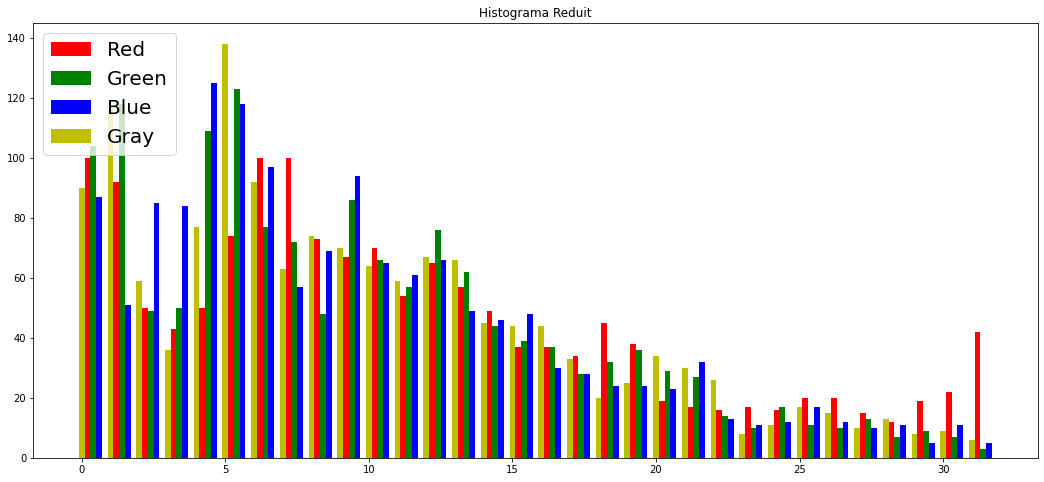

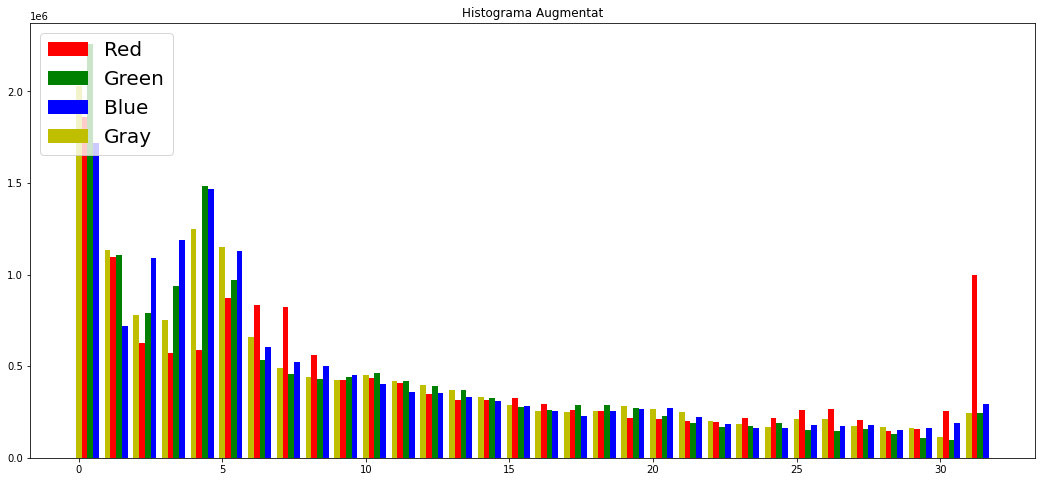

In [15]:
#Es poden fer servir les dues funcions

image_reduced_rescale = rescale(rgba2rgb(image), 0.1, multichannel=True)
image_augmented_rescale = rescale(rgba2rgb(image), 10, multichannel=True)

makeHistogram(image_reduced_rescale, 32, 'Histograma Reduit')
makeHistogram(image_augmented_rescale, 32, 'Histograma Augmentat')

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original image and calculate its histogram.
2. Convolve the  reduced image 10 times and calculate its histogram.
3. Convolve the  augmented image 10 times and calculate its histogram.

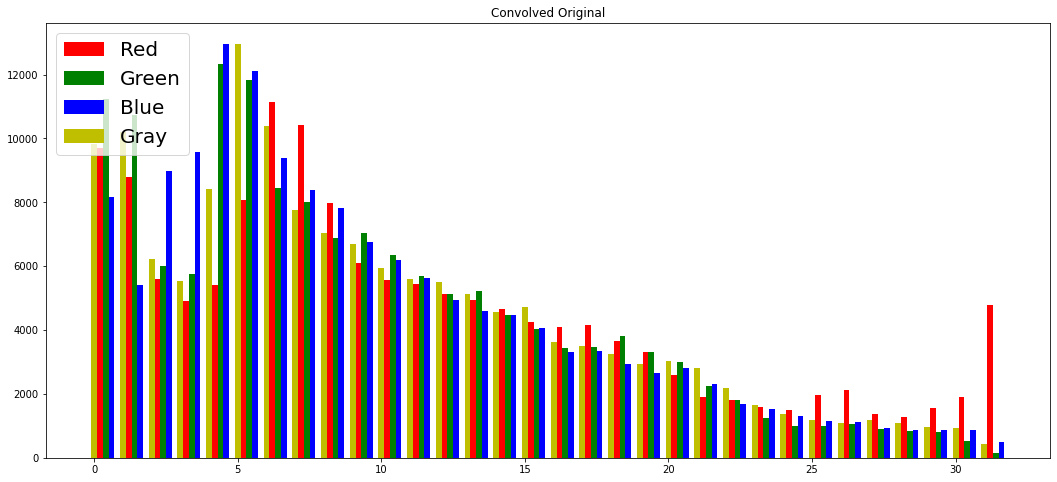

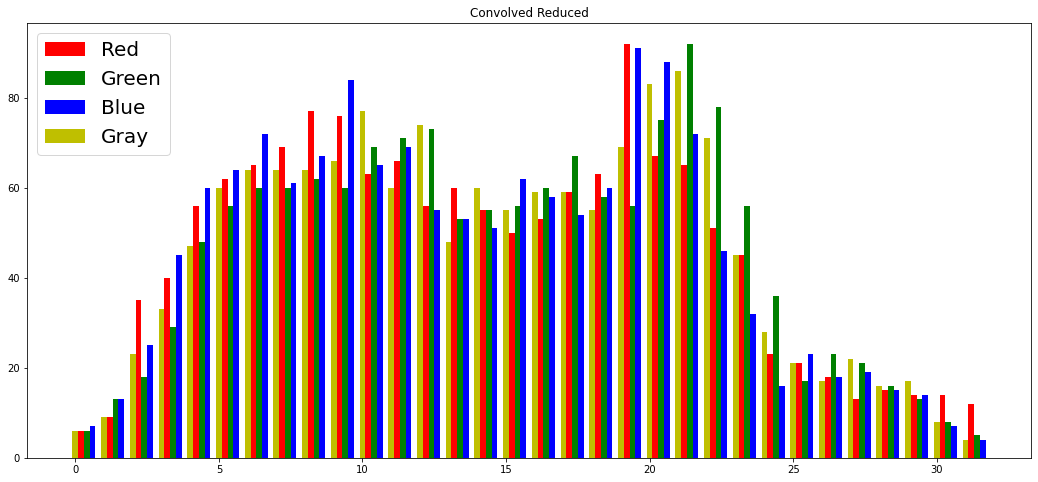

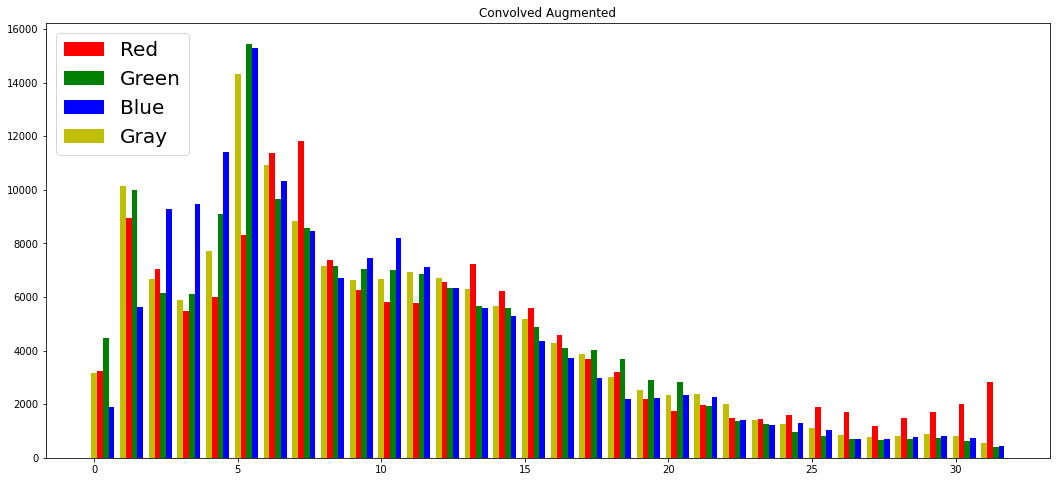

In [18]:
from scipy.ndimage import convolve

mask = np.ones((15,15)) 
mask = mask/np.sum(mask) #Normalize

convolved_image = convolveRGB(image, mask, mode='constant', cval=0.0)
makeHistogram(convolved_image, 32, 'Convolved Original')

convolved_reduced_image = convolveRGB(reduced_image, mask, mode='constant', cval=0.0)
makeHistogram(convolved_reduced_image, 32, 'Convolved Reduced')

convolved_augmented_image = convolveRGB(augmented_image, mask, mode='constant', cval=0.0)
makeHistogram(convolved_augmented_image, 32, 'Convolved Augmented')

The explanation on this is in the same line as with the resize.

THe convolution on the augmented image is almost the same because the new pixels have the same value as the old ones, so the weighted average leaves the things the same. Is a little bit less inclied because the averages are more similar in the augmented than the normal, cause the deviation is less (we are repeating pixels)

The convolution on the reduced image, come che sta averageando i pixeli diventa piu simile a una distribuzione normale, perque tutte le parte dalla image

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `face.png`:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: search for the skimage.filters function for creating the different filters.

In [ ]:
from skimage.filters import gaussian, median

face=io.imread('images/face.png')
print(face.shape)
face_gaussian = gaussian(face, sigma=1)
face_gaussian_2 = gaussian(face, sigma = 0.1)
face_median = median(face)

visualize3(
    face_gaussian, face_gaussian_2, face_median,
    "Face Gaussia. Sigma = 1", "Face Gaussian. Sigma = 0.1", "Face Median"
)

b) **(Optional)** Apply the smoothing on some other images and present their results.

In [ ]:
street=io.imread('images/street.png')
# house = rgba2rgb(house)
print(street.shape)
street_gaussian = gaussian(street, sigma=5)
street_gaussian_2 = gaussian(street, sigma = 0.7)
street_median = median(street)

visualize3(
    street_gaussian, street_gaussian_2, street_median,
    "Street Gaussia. Sigma = 5", "Street Gaussian. Sigma = 0.7", "Street Median"
)

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Roberts.
2. Prewitt
3. Sobel
4. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

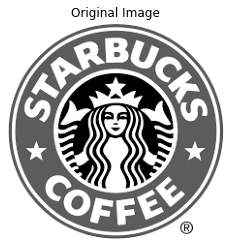

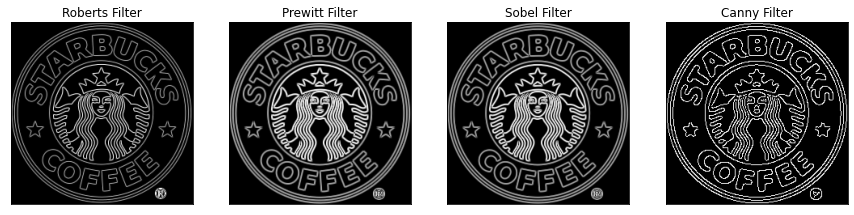

In [20]:
from skimage import filters 
from skimage import feature 


image=io.imread('images/logo.png')
image = rgb2gray(rgba2rgb(image))
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.title("Original Image")
plt.show()

image_roberts=filters.roberts(image)
image_prewitt=filters.prewitt(image)
image_sobel = filters.sobel(image)
image_canny = feature.canny(image, sigma=1.5)

visualize4(
    image_roberts, image_prewitt, image_sobel, image_canny,
    "Roberts Filter", "Prewitt Filter", "Sobel Filter", "Canny Filter"
)

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

In [ ]:
#your solution

c) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


In [ ]:
#your solution

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

In [ ]:
einstein=io.imread('images/Einstein.jpg')
monroe=io.imread('images/monroe.jpg')

visualize2(einstein, monroe, 'Einstein', 'Monroe')

In [ ]:
einstein_low_pass = filters.gaussian(einstein, sigma=1)
monroe_low_pass = filters.gaussian(monroe, sigma=1)
visualize2(einstein_low_pass, monroe_low_pass, "Einstein Low Pass Filtered", "Monroe Low Pass Filtered")

In [ ]:
from skimage import img_as_ubyte


einstein_high_pass_laplace = filters.laplace(einstein)
monroe_high_pass_laplace = filters.laplace(monroe)

visualize2(
    einstein_high_pass_laplace, monroe_high_pass_laplace,
    "Einstein High Pass Filtered (Laplace)", "Monroe High Pass Filtered (Laplace)"
)


monroe = monroe.astype(float)/255.
monroe_high_pass = monroe - monroe_low_pass #Primer metode (no funciona pq els tipus no estan be)

einstein = einstein.astype(float)/255.
einstein_high_pass = einstein - einstein_low_pass

visualize2(
    einstein_high_pass, monroe_high_pass,
    "Enstein High Pass", "Monroe High Pass"
)

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

In [ ]:
hybrid = einstein_low_pass + monroe_high_pass_laplace
hybrid_normalize = (hybrid - hybrid.min())/(hybrid.max() - hybrid.min())
print(hybrid_normalize.max(), hybrid_normalize.min())

plt.imshow(hybrid_normalize, cmap="gray")
plt.show()

c) **(Optional)**

Compute hybrid images from other images. Apply it over color images.

In [ ]:
#your solution

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code, you do not need to implement anything.

In [ ]:
%matplotlib nbagg 
from matplotlib import pyplot as plt, animation as anim
from skimage import io

from skimage.filters import gaussian


bigbang_imgs = io.collection.ImageCollection('images/bigbangcollection/*.png')
total_film_frames = len(bigbang_imgs)

#generates the next frame
def frame_update(frame_num) :
    aux = filters.gaussian(bigbang_imgs[frame_num], sigma=5)
    act_img.set_array(aux)
    #act_img = filters.ga1usian(act_img, sigma=2)
    return act_img

#visualize the video using FuncAnimation
fig = plt.figure()
act_img = plt.imshow(bigbang_imgs[0], animated = True) #careful with act_img.It is NOT a narray, is a show directly
ani = anim.FuncAnimation(fig, frame_update, frames = total_film_frames, interval = 20, repeat = False)
plt.show()